 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [264]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [265]:
whale_path = Path("Resources/whale_returns.csv")
algo_path = Path("Resources/algo_returns.csv")
sp_path = Path("Resources/sp_tsx_history.csv")

In [266]:
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df = pd.read_csv(sp_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [267]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [268]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [269]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [270]:
# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [271]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [272]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [273]:
# Reading S&P TSX 60 Closing Prices
sp_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [274]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [275]:
# Fix Data Types
sp_df['Close']= sp_df['Close'].str.replace('$','')
sp_df['Close']= sp_df['Close'].str.replace(',','')
sp_df['Close']= sp_df['Close'].astype('float')
#sp_df.head()
#sp_df.drop(columns = ['Clode','Cloee'],inplace=True)
#sp_df.head()
sp_df.dtypes

Close    float64
dtype: object

In [276]:
# Calculate Daily Returns
daily_returns = sp_df.pct_change()
daily_returns.head()

daily_returns.dtypes

Close    float64
dtype: object

In [277]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [278]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close': 'SP_tsx'})

daily_returns.head()

,SP_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [279]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_cols = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="inner")
joined_data_cols.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

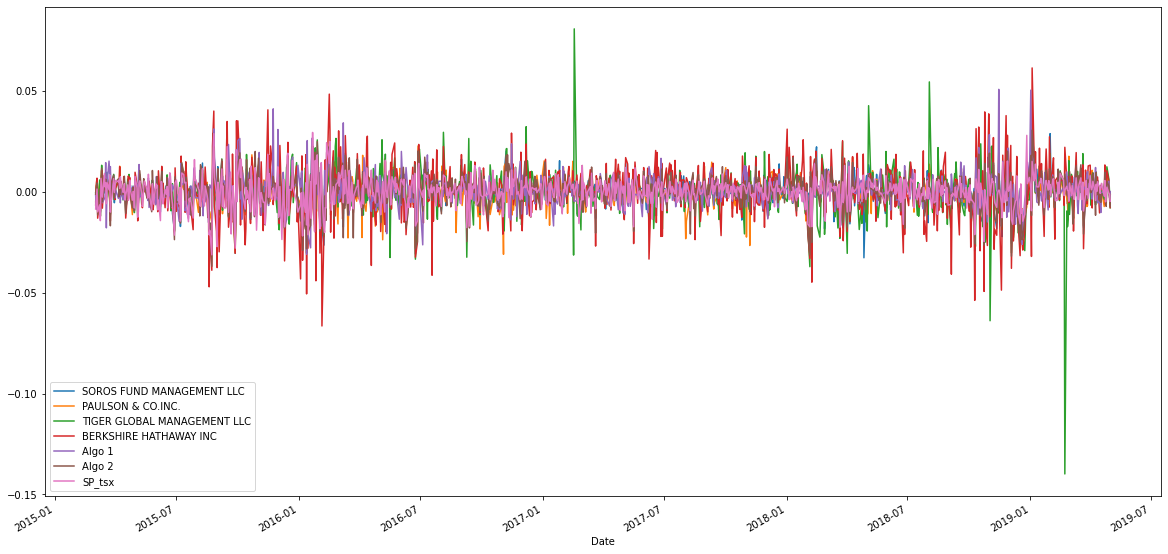

In [280]:
# Plot daily returns of all portfolios
joined_data_cols.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

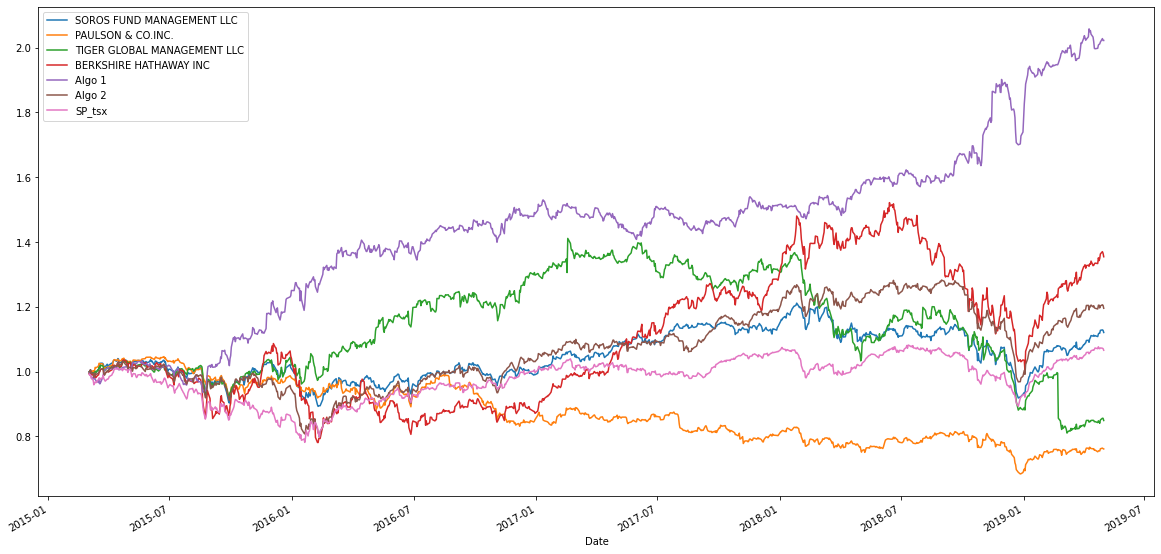

In [281]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + joined_data_cols).cumprod()
cumulative_returns.dropna(inplace=True)

#print(cumulative_returns)

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

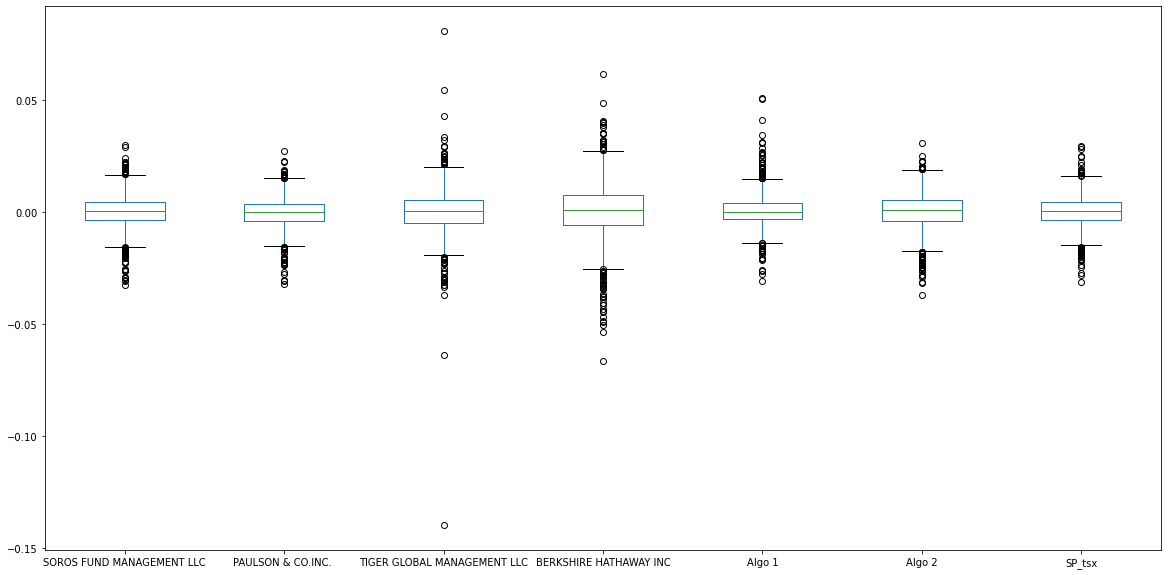

In [282]:
# Box plot to visually show risk
joined_data_cols.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [283]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_cols.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [284]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std1 = daily_returns.std()
daily_std1.head()

# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

### Calculate the Annualized Standard Deviation

In [285]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

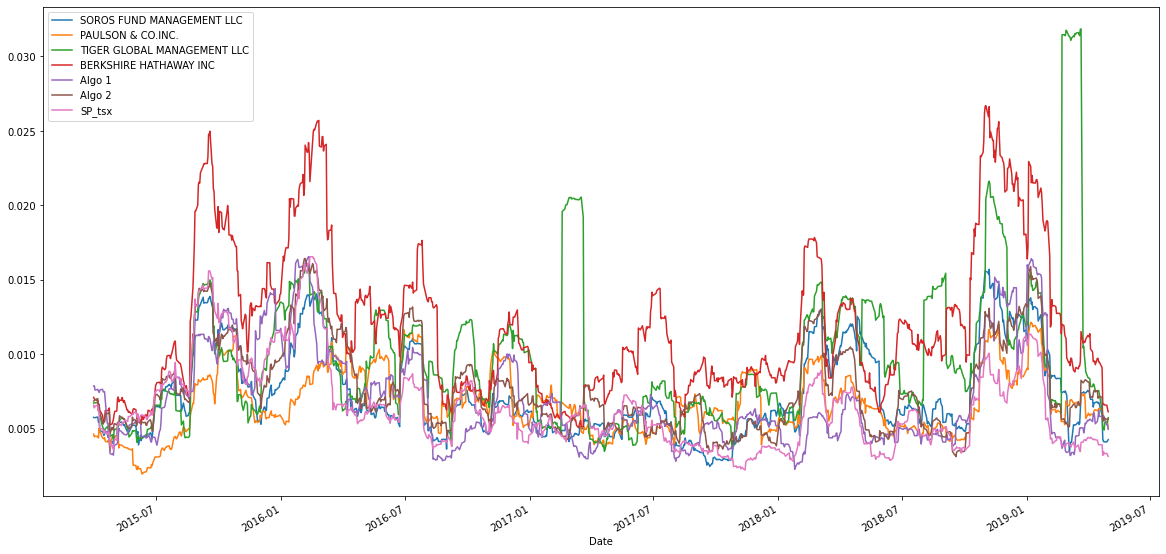

In [286]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_std_data = joined_data_cols.rolling(window=21).std()
Rolling_std_data = Rolling_std_data.dropna()
Rolling_std_data.head()


# Plot the rolling standard deviation
joined_data_cols.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

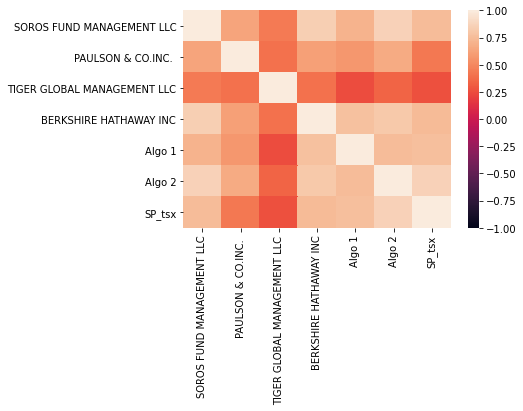

In [287]:
# Calculate the correlation
correlation = Rolling_std_data.corr()
correlation

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Variance of SP_tsx Returns'}, xlabel='Date'>

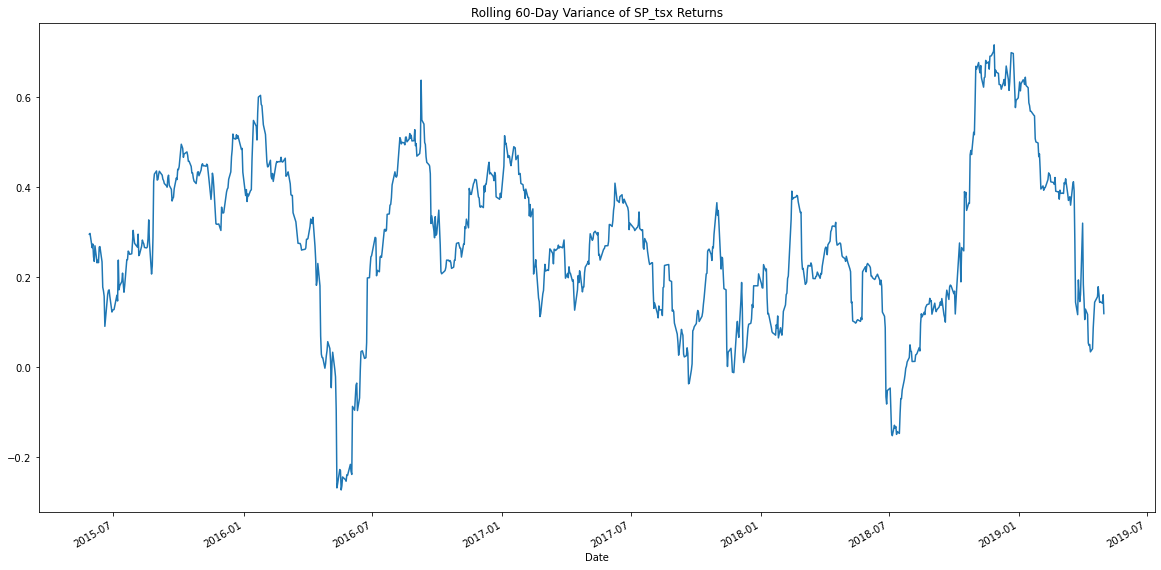

In [288]:
# Calculate covariance of a single portfolio
covariance = joined_data_cols['Algo 1'].rolling(window=60).cov(joined_data_cols['SP_tsx'])
covariance

# Calculate variance of S&P TSX
variance = joined_data_cols['SP_tsx'].rolling(window=60).var()
variance

# Computing beta
SP_tsx_beta = covariance / variance
SP_tsx_beta

# Plot beta trend
SP_tsx_beta.plot(figsize=(20, 10), title='Rolling 60-Day Variance of SP_tsx Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

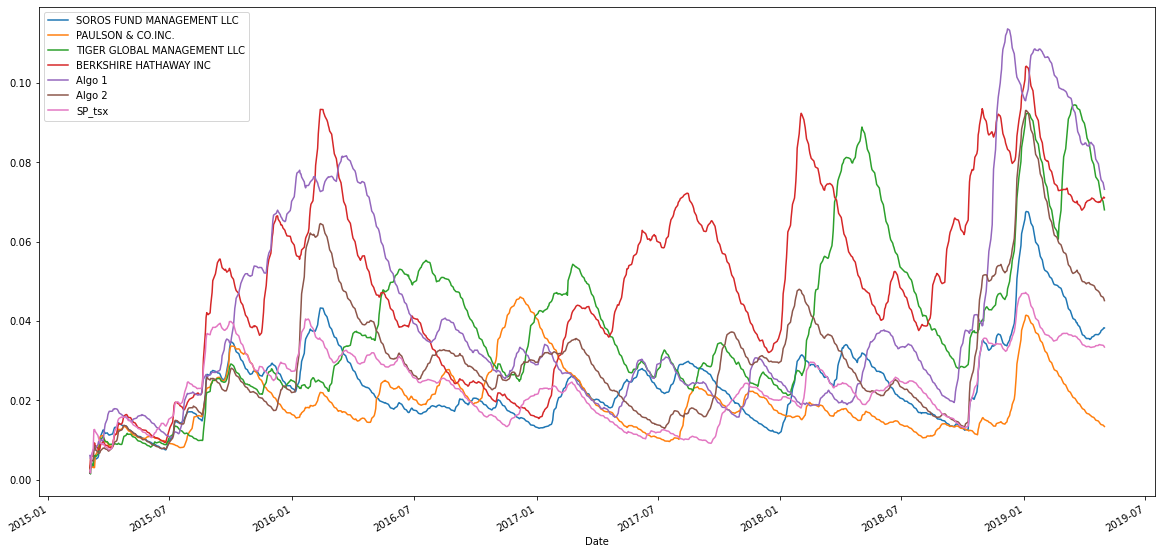

In [289]:
# Use `ewm` to calculate the rolling window

cumulative_returns.ewm(halflife=21).std().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [290]:
# Annualized Sharpe Ratios
sharpe_ratios = ((joined_data_cols.mean()) * 252) / annualized_std
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
SOROS FUND MANAGEMENT LLC      0.286709
SP_tsx                         0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:>

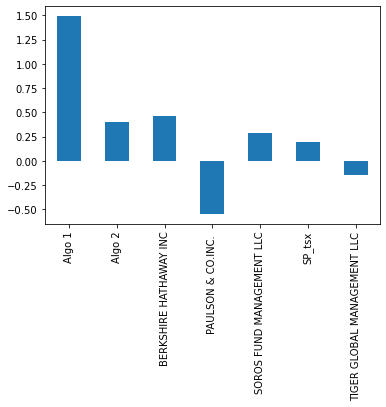

In [291]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes, Algo1 outperformed all other stocks and Algo2 have outperformed all but one stock. Hence, overall the strategies outperformed SP TSX 60 and Whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [292]:
# Reading data from 1st stock
shop_path = Path("Resources/shop_historical.csv")
shop_returns = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_returns = shop_returns.sort_index()
shop_returns = shop_returns.rename(columns= {"Close":"SHOP"})
shop_returns = shop_returns.drop(columns=["Symbol"])
shop_returns.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [293]:
# Reading data from 2nd stock
otex_path = Path("Resources/otex_historical.csv")
otex_returns = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_returns = otex_returns.sort_index()
otex_returns = otex_returns.rename(columns= {"Close":"OTEX"})
otex_returns = otex_returns.drop(columns=["Symbol"])
otex_returns.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [263]:
# Reading data from 3rd stock
loblaws_path = Path("Resources/l_historical.csv")
loblaws_returns = pd.read_csv(loblaws_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
loblaws_returns = loblaws_returns.sort_index()
loblaws_returns = loblaws_returns.rename(columns= {"Close":"LOBLAWS"})
loblaws_returns = loblaws_returns.drop(columns=["Symbol"])
loblaws_returns.head()

,LOBLAWS
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [295]:
# Combine all stocks in a single DataFrame
new_combined_stx = pd.concat([shop_returns, otex_returns, loblaws_returns], axis="columns", join="inner")
new_combined_stx.head()

,SHOP,OTEX,LOBLAWS
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [260]:
# Reset Date index
new_combined_stx.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=501, freq=None)

In [298]:
# Reorganize portfolio data by having a column per symbol

# this function was performed when I was reading the data at start 

In [301]:
# Calculate daily returns
new_combined_daily = new_combined_stx.pct_change()

# Drop NAs
new_combined_daily.dropna(inplace=True)

# Display sample data
new_combined_daily.head()

,SHOP,OTEX,LOBLAWS
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [302]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns= pd.DataFrame(new_combined_daily.dot(weights)).rename(columns ={0:"New Portfolio"})

# Display sample data
weighted_returns.head()


,New Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [303]:
# Join your returns DataFrame to the original returns DataFrame
all_stx = pd.concat([joined_data_cols, weighted_returns], axis= "columns", join= "inner")
all_stx.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx,New Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [304]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stx.dropna(inplace=True)
all_stx.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_tsx,New Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [305]:
# Calculate the annualized `std`

all_stx_annual_std = (all_stx.std()) * np.sqrt(252)
all_stx_annual_std = all_stx_annual_std.sort_values(ascending=False)
all_stx_annual_std

BERKSHIRE HATHAWAY INC         0.227445
New Portfolio                  0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
SP_tsx                         0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

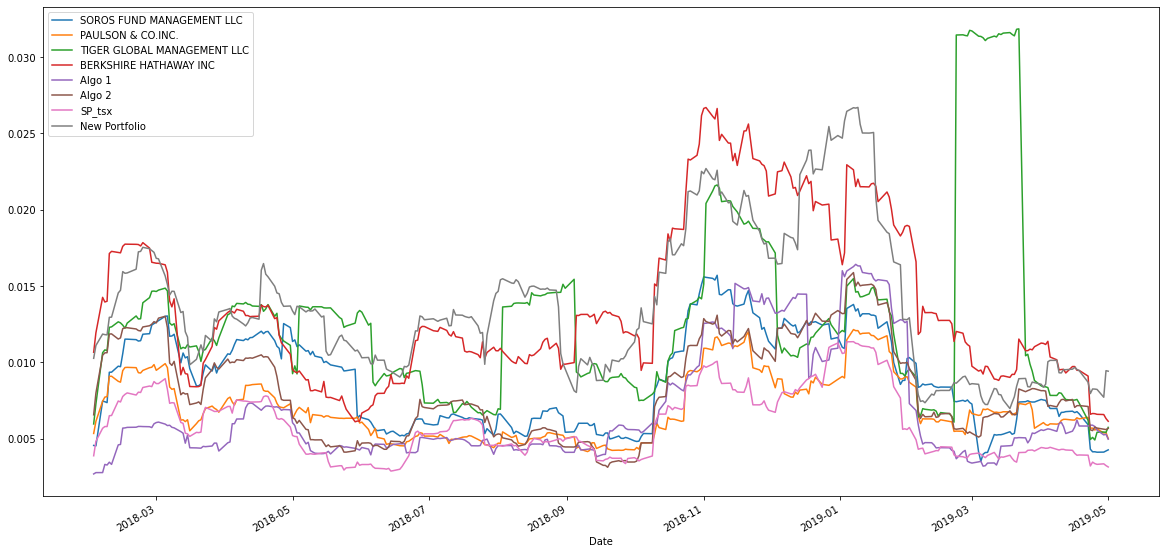

In [306]:
# Calculate rolling standard deviation
rolling_all_stx = all_stx.rolling(window=21).std()
rolling_all_stx = rolling_all_stx.dropna()
rolling_all_stx.head()

# Plot rolling standard deviation
rolling_all_stx.plot(figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

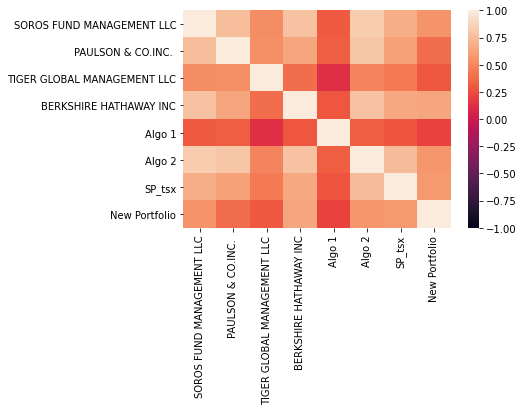

In [308]:
# Calculate and plot the correlation
all_stx_correlation = all_stx.corr()
all_stx_correlation

sns.heatmap(all_stx_correlation, vmin= -1,vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

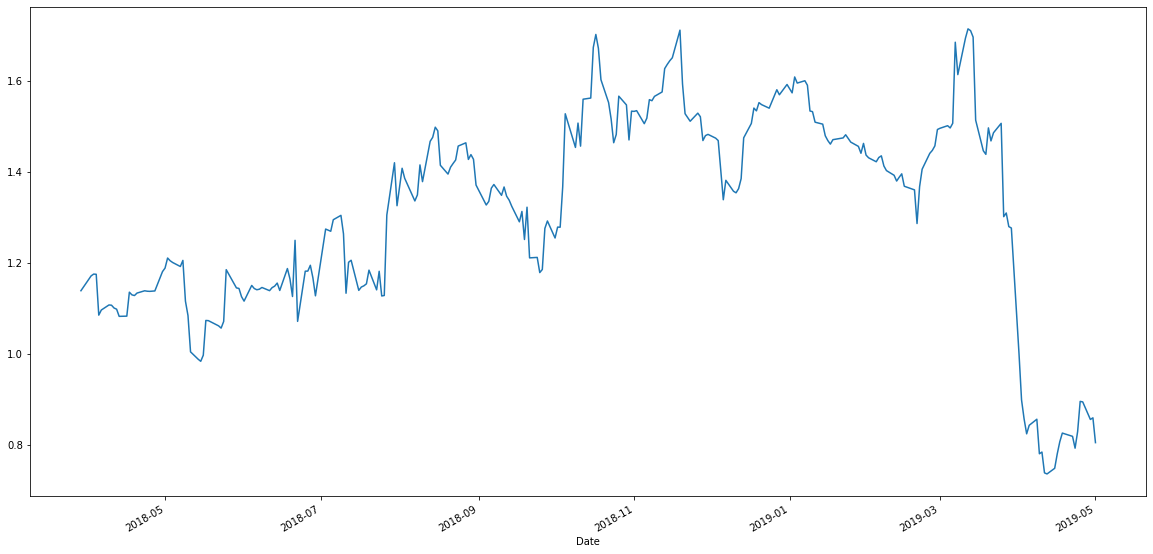

In [310]:
# Calculate and plot Beta

new_VS_tsx = all_stx['New Portfolio'].rolling(window=60).cov(all_stx['SP_tsx'])
new_VS_tsx.dropna(inplace=True)
new_VS_tsx

Beta2 = new_VS_tsx / variance
Beta2.dropna(inplace=True)
Beta2
Beta2.plot(figsize=(20,10))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [311]:
# Calculate Annualzied Sharpe Ratios
new_combined_sharpe = ((all_stx.mean()) * 252) / (all_stx.std() * np.sqrt(252))
new_combined_sharpe = new_combined_sharpe.sort_values(ascending=False)
new_combined_sharpe

Algo 1                         1.901461
New Portfolio                  1.564547
BERKSHIRE HATHAWAY INC         0.195907
SP_tsx                         0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Including New Portfolio'}>

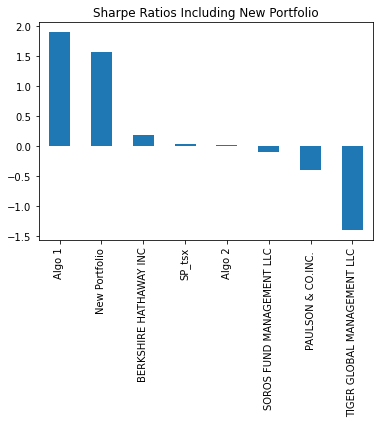

In [312]:
# Visualize the sharpe ratios as a bar plot
new_combined_sharpe.plot(kind="bar", title="Sharpe Ratios Including New Portfolio")

### How does your portfolio do?

My portfolio is only second to Algo1, which is the best performing stock, based on the sharpe ratio. Hence, I would invest in the suggested stocks.